#  Wavelets and froward modeling 

In [87]:
import bruges as bg

m, top, base, ref = bg.models.wedge(width=280)

# Make an earth

In [88]:
import numpy as np

vps = np.array([2320, 2350, 2350])
vss = np.array([1150, 1250, 1200])
rhos = np.array([2650, 2600, 2620])

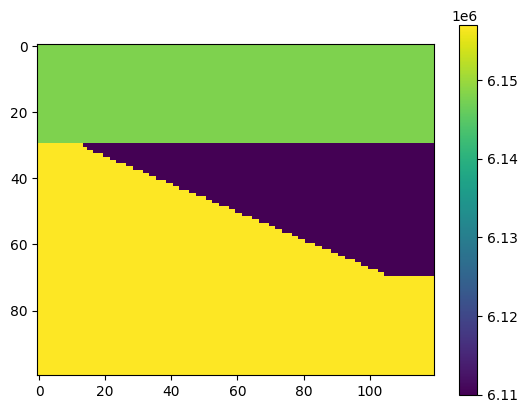

In [89]:
impedance = vp * rho

plt.imshow(impedance, interpolation='none')
plt.colorbar()
plt.show()

# Acoustic reflectivity

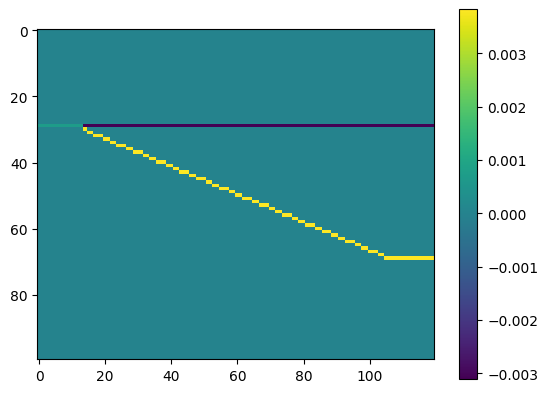

In [90]:
rc = bg.reflection.acoustic_reflectivity(vp, rho)

plt.imshow(rc)
plt.colorbar()
plt.show()

In [91]:
rc = bg.reflection.reflectivity(vp, vs, rho, theta=np.arange(60), method='shuey')

rc.shape

(60, 100, 120)

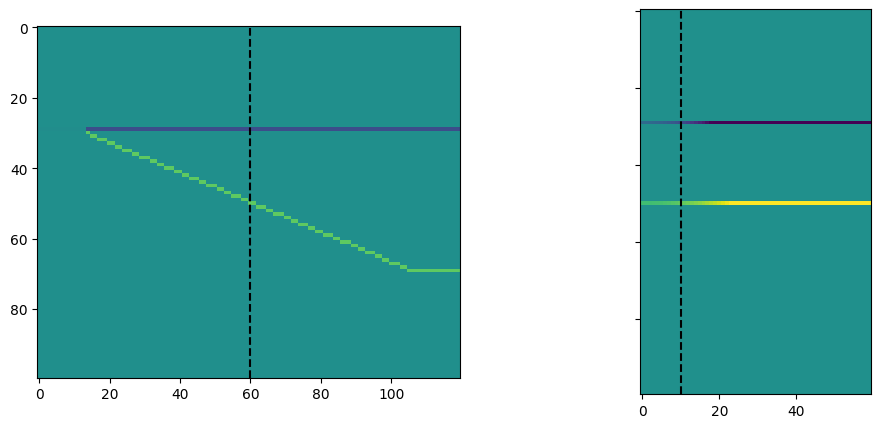

In [92]:
offset = 10  # degrees
trace = 60

fig, axs = plt.subplots(ncols=2, figsize=(12, 5), sharey=True)
axs[0].imshow(rc[offset].real, vmin=-0.01, vmax=0.01)
axs[0].axvline(trace, c='k', ls='--')
axs[1].imshow(rc[:, :, trace].real.T, vmin=-0.01, vmax=0.01)
axs[1].axvline(offset, c='k', ls='--')
plt.show()

# wavelet

Text(0.5, 1.0, 'ricker')

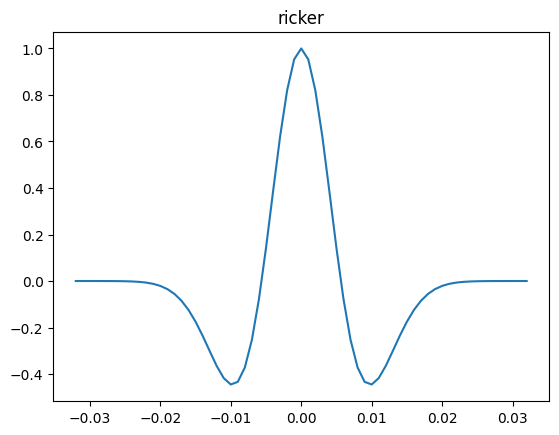

In [93]:
w, t = bg.filters.ricker(0.064, 0.001, 40)

plt.plot(t, w)
plt.title('ricker')

Text(0.5, 1.0, 'Ormsby')

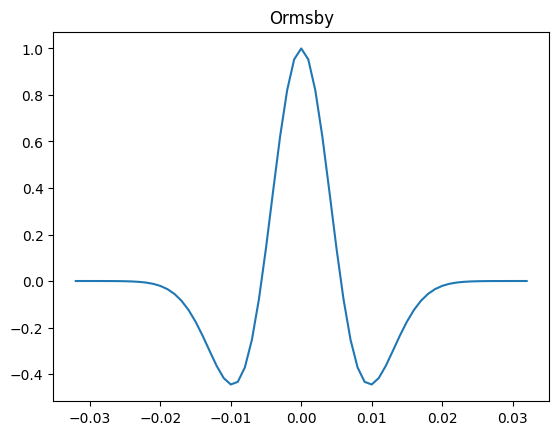

In [94]:
w2, t2 = bg.filters.ormsby(duration=0.4, dt=0.001, f=[4, 8, 45, 60])

plt.plot(t, w)
plt.title('Ormsby')

Text(0.5, 1.0, 'klauder')

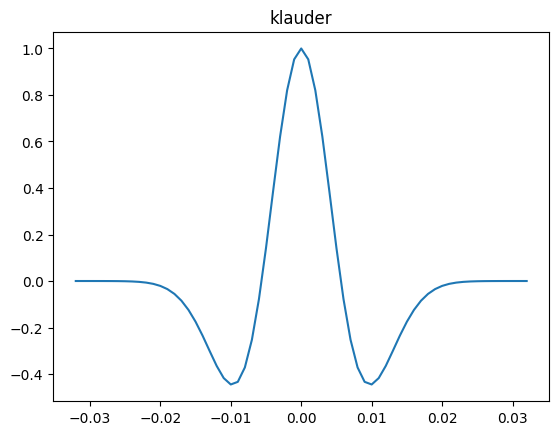

In [95]:
w3, t3 = bg.filters.klauder(duration=0.400, dt=0.001, f=[4, 40])

plt.plot(t, w)
plt.title('klauder')

# convolution

In [96]:
syn = bg.filters.convolve(rc, w, axis=1)

syn.shape

(60, 100, 120)

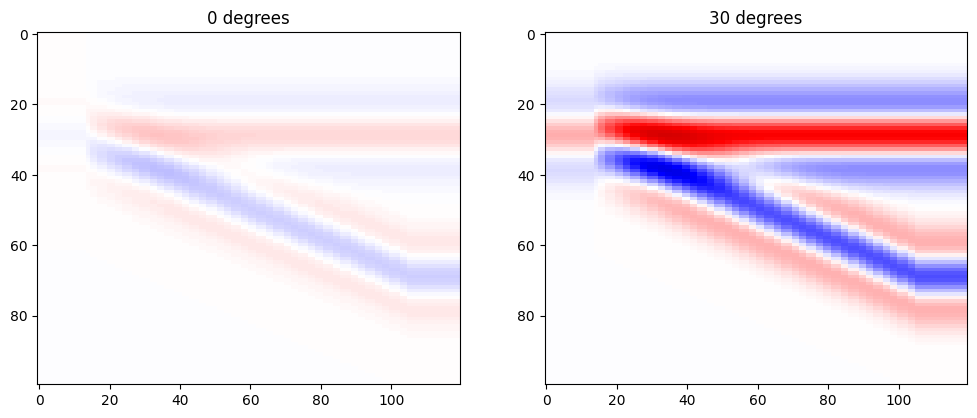

In [97]:
# A quick way to set a sensible max, so both panels have the same colours.
ma = np.percentile(syn, 99.9)

near, far = 0, 30

fig, axs = plt.subplots(ncols=2, figsize=(12, 5))
axs[0].imshow(syn[near], cmap='seismic_r', vmin=-ma, vmax=ma)
axs[0].set_title(f'{near} degrees')
axs[1].imshow(syn[far], cmap='seismic_r', vmin=-ma, vmax=ma)
axs[1].set_title(f'{far} degrees')
plt.show()